In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Generating random sample data
n = 100  # number of data points

years_of_experience = np.random.uniform(0, 20, n)  # random years of experience between 0 and 20 years
base_salary = 30000  # a base salary
noise = np.random.normal(0, 3000, n)  # random noise to add some variability

# Hypothetical linear relation for salary based on years of experience
salary = base_salary + (5000 * years_of_experience) + noise

# Creating the dataframe
salary_df = pd.DataFrame({
    'Years of Experience': years_of_experience,
    'Salary': salary
})

salary_df.head()

,Years of Experience,Salary
0,7.490802,67715.153089
1,19.014286,124174.408590
2,14.639879,103474.676511
3,11.973170,83903.141676
4,3.120373,44942.848381


In [3]:
# # Optional
# salary_df.to_excel('salary_df.xlsx')
# salary_df = pd.read_excel('salary_df.xlsx',index_col=0) # be sure to use index_col=0
# salary_df.head()

# Splitting Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# 1. Split the data into training and testing sets
X = salary_df[['Years of Experience']].values
y = salary_df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train

array([[18.4374847 ],
       [17.74425485],
       [ 3.99347564],
       [ 0.68777042],
       [19.73773873],
       [ 3.6680902 ],
       [ 2.4407647 ],
       [10.45465659],
       [14.16145156],
       [ 0.11044234],
       [19.39819704],
       [10.40136042],
       [ 6.50366644],
       [11.84829138],
       [11.22554395],
       [ 3.11989041],
       [ 2.8184845 ],
       [10.85392166],
       [16.16794696],
       [ 6.08484486],
       [ 3.69708911],
       [19.31264066],
       [17.32352292],
       [ 9.87591193],
       [10.28468877],
       [ 5.8245828 ],
       [12.46596254],
       [15.70351923],
       [16.57475018],
       [ 4.24678221],
       [ 9.12139968],
       [11.97316968],
       [10.49512863],
       [13.68466053],
       [12.02230023],
       [ 7.16931457],
       [ 1.16167224],
       [ 5.61869019],
       [ 6.09227538],
       [ 9.4442985 ],
       [ 1.76985004],
       [ 2.15782854],
       [11.95799958],
       [18.18640804],
       [19.39169256],
       [16

In [6]:
X_test

array([[ 1.27116701],
       [17.89654701],
       [15.44489539],
       [13.25044569],
       [ 5.17559963],
       [ 8.80304987],
       [ 5.84289297],
       [17.26206852],
       [ 0.41168989],
       [ 7.49080238],
       [ 8.63890037],
       [12.15089704],
       [16.30922857],
       [18.97771075],
       [ 2.39188492],
       [ 3.12037281],
       [15.42540693],
       [ 1.48089303],
       [16.64885282],
       [ 3.41048247]])

In [7]:
y_train

array([122393.11242673, 121611.40264537,  48939.23466626,  36867.32055507,
       131034.16227538,  51246.38595694,  42099.68817536,  82041.97780996,
        99301.98664885,  32118.03640921, 127977.23854518,  77801.2489294 ,
        64879.5860139 ,  88757.59975121,  83866.51126388,  46670.78974816,
        39269.97279379,  88191.03657867, 110760.1931853 ,  58318.06501432,
        55056.81242998, 120806.88966156, 115062.80392267,  76932.12878154,
        79016.6120337 ,  54732.36917541,  93751.31144549, 107255.66017101,
       115314.3025673 ,  52773.71336717,  71360.88619555,  83903.1416759 ,
        81492.65672343,  97846.21975687,  87686.02036564,  66725.79027432,
        40242.04335104,  58775.83077255,  60642.06754716,  78459.835297  ,
        35662.33906401,  43270.69244644,  85138.00758791, 123187.83930594,
       123986.85380106, 110773.599651  ,  65379.49054175,  38234.71275072,
        56168.71862877,  73777.5577603 ,  39443.85169843,  76011.65689827,
        31764.45618835,  

In [8]:
y_test

array([ 38325.4958545 , 117972.30808042, 103513.62479703,  93524.06607101,
        58251.09400113,  74919.89140096,  59229.80522345, 121907.66612099,
        34804.65578269,  67715.15308945,  72018.17740482,  96413.04289378,
       112437.09686518, 124665.21597803,  44425.60507381,  44942.84838073,
       105086.96050386,  38101.22626489, 111654.98346874,  47576.14580722])

# Supervised Learning

## Linear Regression

Mean Absolute Error (MAE): 1774.0277337569398
Mean Squared Error (MSE): 5883295.623453032
Root Mean Squared Error (RMSE): 2425.5505815078423
R-squared (R^2): 0.993824801393746


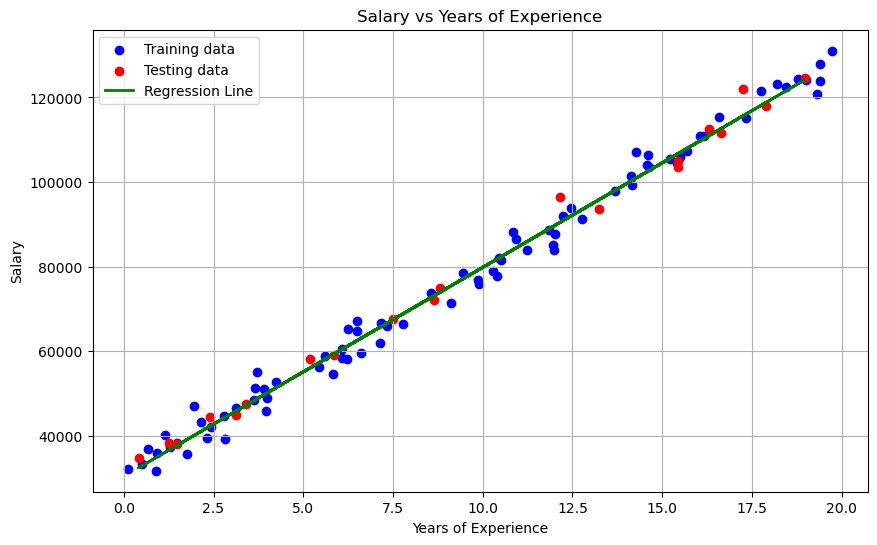

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

# 3. Visualize the results
plt.figure(figsize=(10,6))

# Plotting the training data in blue
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plotting the testing data in red
plt.scatter(X_test, y_test, color='red', label='Testing data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Generate the dataset
np.random.seed(42)
n = 500

weather_conditions = np.random.randint(0, 2, n)
num_passengers = np.random.randint(50, 300, n)
time_of_day = np.random.uniform(0, 24, n)
previous_flight_delay = np.random.randint(0, 2, n)

# Hypothetically, if there's bad weather OR the previous flight was delayed, increase chances of delay
delayed = np.where((weather_conditions + previous_flight_delay + (num_passengers > 200) * 0.5) + np.random.normal(0, 0.5, n) > 1.5, 1, 0)

airport_df = pd.DataFrame({
    'Weather Conditions': weather_conditions,
    'Number of Passengers': num_passengers,
    'Time of Day': time_of_day,
    'Previous Flight Delay': previous_flight_delay,
    'Delayed': delayed
})

# 2. Split the data into training and testing sets
X = airport_df[['Weather Conditions', 'Number of Passengers', 'Time of Day', 'Previous Flight Delay']]
y = airport_df['Delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
log_y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, log_y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

prec = precision_score(y_test, log_y_pred)
print(f"Precision Score: {prec*100:.2f}%")

recall = recall_score(y_test, log_y_pred)
print(f"Recall: {recall*100:.2f}%")

f1 = f1_score(y_test, log_y_pred)
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 80.00%
Precision Score: 80.00%
Recall: 63.16%
F1 Score: 70.59%


## Naive-Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy*100:.2f}%")

nb_prec= precision_score(y_test, nb_pred)
print(f"Naive Bayes Precision: {nb_prec*100:.2f}%")

nb_recall = recall_score(y_test, nb_pred)
print(f"Naive Bayes Recall: {nb_recall*100:.2f}%")

nb_f1 = f1_score(y_test, nb_pred)
print(f"Naive Bayes F1: {nb_f1*100:.2f}%")

Naive Bayes Accuracy: 76.00%
Naive Bayes Precision: 88.89%
Naive Bayes Recall: 42.11%
Naive Bayes F1: 57.14%


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")

rf_prec= precision_score(y_test, rf_pred)
print(f"Random Forest Precision: {rf_prec*100:.2f}%")

rf_recall = recall_score(y_test, rf_pred)
print(f"Random Forest Recall: {rf_recall*100:.2f}%")

rf_f1 = f1_score(y_test, rf_pred)
print(f"Random Forest F1: {rf_f1*100:.2f}%")

Random Forest Accuracy: 73.00%
Random Forest Precision: 63.41%
Random Forest Recall: 68.42%
Random Forest F1: 65.82%


## Decision-Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")

dt_prec= precision_score(y_test, dt_pred)
print(f"Decision Tree Precision: {dt_prec*100:.2f}%")

dt_recall = recall_score(y_test, dt_pred)
print(f"Decision Tree Recall: {dt_recall*100:.2f}%")

dt_f1 = f1_score(y_test, dt_pred)
print(f"Decision Tree F1: {nb_f1*100:.2f}%")

Decision Tree Accuracy: 73.00%
Decision Tree Precision: 63.41%
Decision Tree Recall: 68.42%
Decision Tree F1: 57.14%


## KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%")

knn_prec= precision_score(y_test, knn_pred)
print(f"KNN Precision: {dt_prec*100:.2f}%")

knn_recall = recall_score(y_test, knn_pred)
print(f"KNN Recall: {dt_recall*100:.2f}%")

knn_f1 = f1_score(y_test, knn_pred)
print(f"KNN F1: {nb_f1*100:.2f}%")

KNN Accuracy: 61.00%
KNN Precision: 63.41%
KNN Recall: 68.42%
KNN F1: 57.14%


C:\Users\louis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Unsupervised Learning

       Speed  Fuel Efficiency  Time of Day  Distance from Station
0  58.829233        13.829315    19.896064               8.837174
1  57.644808        16.160250     4.759578              -2.037319
2  51.484973         9.885660     0.003489               5.476125
3  84.674432        23.473876    14.952439               9.065143
4  44.025459        15.668850     7.967784              -6.701943


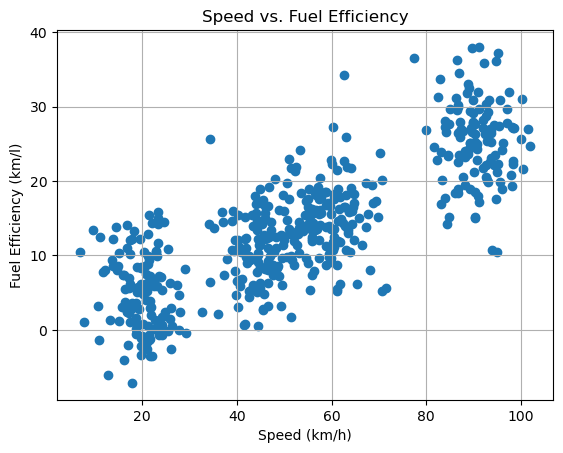

In [15]:
from sklearn.datasets import make_blobs

# Create dataset
n_samples = 500
n_features = 4
centers = [(60, 15, 12, 5), (20, 5, 8, 2), (90, 25, 18, 10), (45, 10, 5, 8)]
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=5, random_state=42)

# Convert to DataFrame for better visualization
transport_df = pd.DataFrame(X, columns=['Speed', 'Fuel Efficiency', 'Time of Day', 'Distance from Station'])

# Display the first few rows
print(transport_df.head())

# Plot Speed vs. Fuel Efficiency
plt.scatter(transport_df['Speed'], transport_df['Fuel Efficiency'], cmap='viridis')
plt.title("Speed vs. Fuel Efficiency")
plt.xlabel("Speed (km/h)")
plt.ylabel("Fuel Efficiency (km/l)")
plt.grid(True)
plt.show()

## K-means Clustering

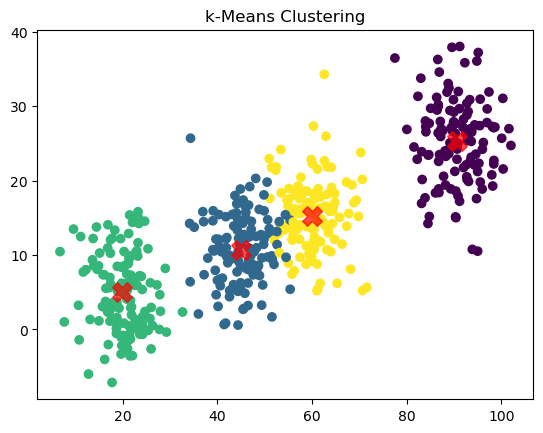

In [16]:
from sklearn.cluster import KMeans

# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.7)
plt.title("k-Means Clustering")
plt.show()


# Principal Component Analysis

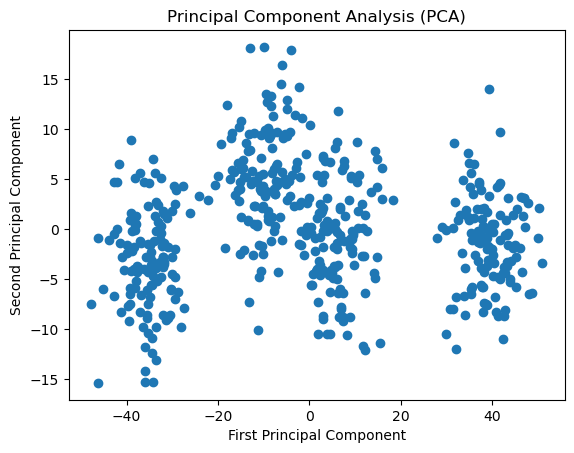

In [17]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title("Principal Component Analysis (PCA)")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# Hidden Markov Models

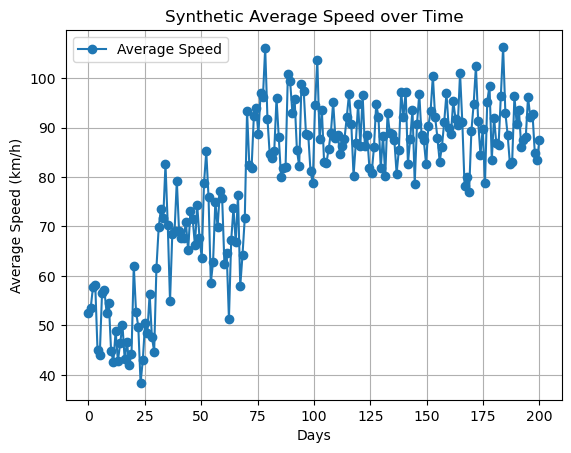

In [18]:
np.random.seed(42)

# Generate synthetic speed data
days = 200
time = np.linspace(0, days, days)

# Generate rush hour data (low speed)
rush_hour = 50 + 5 * np.sin(time) + np.random.normal(0, 5, days)

# Generate normal traffic data (average speed)
normal_traffic = 70 + 5 * np.sin(time) + np.random.normal(0, 5, days)

# Generate late-night data (high speed)
late_night = 90 + 5 * np.sin(time) + np.random.normal(0, 5, days)

# Concatenate sequences
speed = np.concatenate((rush_hour[:30], normal_traffic[30:70], late_night[70:]))

plt.plot(time, speed, '-o', label="Average Speed")
plt.xlabel("Days")
plt.ylabel("Average Speed (km/h)")
plt.legend()
plt.grid(True)
plt.title("Synthetic Average Speed over Time")
plt.show()

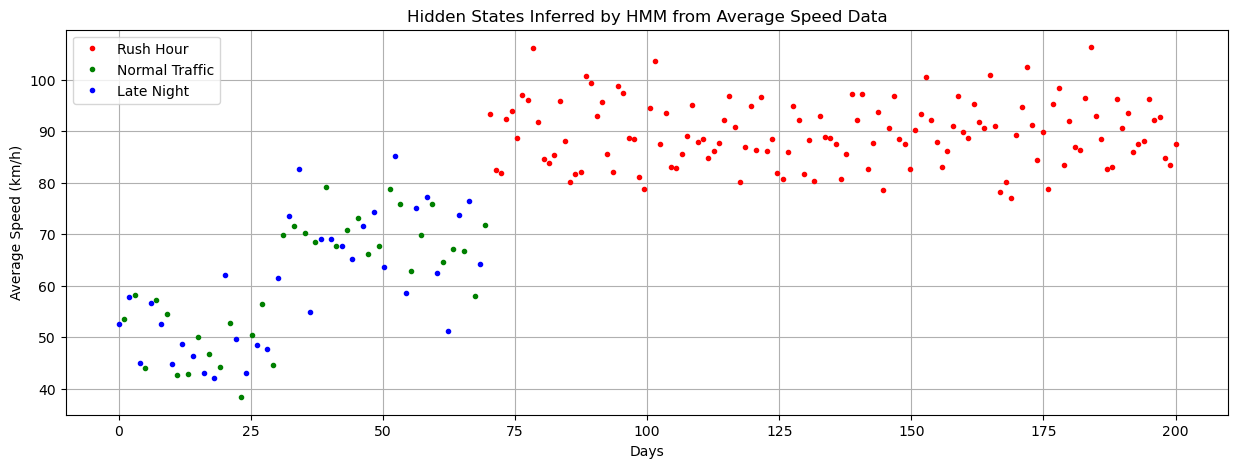

In [19]:
from hmmlearn import hmm
# Reshape data for HMM
X = speed.reshape(-1, 1)

# Create and fit HMM
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
model.fit(X)

# Predict hidden states
hidden_states = model.predict(X)

# Visualization
plt.figure(figsize=(15, 5))

colors = ['r', 'g', 'b']
labels = ['Rush Hour', 'Normal Traffic', 'Late Night']

for i in range(model.n_components):
    idx = (hidden_states == i)
    plt.plot(time[idx], speed[idx], '.', label=labels[i], color=colors[i])

plt.title("Hidden States Inferred by HMM from Average Speed Data")
plt.xlabel("Days")
plt.ylabel("Average Speed (km/h)")
plt.legend()
plt.grid(True)
plt.show()